In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-0a4x37l5/banglakit-lemmatizer
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-0a4x37l5/banglakit-lemmatizer
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-cp37-none-any.whl size=117717 sha256=f0930e51116db1f25213cf0f295600ad83ccdb98c1b9366623ea75d396153d5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hyg8sxnf/wheels/55/76/fb/67135871b310a3abeb998cd696c64d8e9c495f2f33ce2e2e59
Successfully built banglakit-lemmatizer


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
fake=pd.read_csv("/content/drive/MyDrive/research/LabeledFake-1K.csv", encoding='utf-8')

true=pd.read_csv("/content/drive/MyDrive/research/LabeledAuthentic-7K.csv", encoding='utf-8')

In [ ]:
df=pd.concat([true,fake])

In [ ]:
df.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,NaN
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,0.0,NaN
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,NaN
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,NaN
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,0.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8501 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  8501 non-null   int64  
 1   domain     8501 non-null   object 
 2   date       8501 non-null   object 
 3   category   8501 non-null   object 
 4   source     8501 non-null   object 
 5   relation   8501 non-null   object 
 6   headline   8501 non-null   object 
 7   content    8501 non-null   object 
 8   label      8501 non-null   float64
 9   F-type     1299 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 730.6+ KB


In [ ]:
df.shape

(8501, 10)

#Target Feature View

In [ ]:
true['target']=1
fake['target']=0

In [ ]:
df=pd.concat([true,fake])

In [ ]:
df.head()

,articleID,domain,date,category,source,relation,headline,content,label,target,F-type
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,1,NaN
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,0.0,1,NaN
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,1,NaN
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,1,NaN
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,0.0,1,NaN


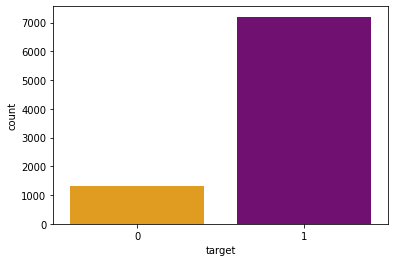

In [ ]:
sns.countplot(x='target',data=df,palette=['orange','purple'])

In [ ]:
 temp = df.groupby('target').count()['content'].reset_index().sort_values(by='content',ascending=False)
 temp.style.background_gradient(cmap='Purples')

,target,content
1,1,7202
0,0,1299


In [ ]:
temp

,target,content
1,1,7202
0,0,1299


In [ ]:
df.isnull().sum()

articleID       0
domain          0
date            0
category        0
source          0
relation        0
headline        0
content         0
label           0
target          0
F-type       7202
dtype: int64

No null values are present in the dataset

In [ ]:
df.nunique()

articleID    7231
domain         93
date         7152
category       12
source       3223
relation        3
headline     8029
content      8501
label           2
target          2
F-type          3
dtype: int64

In [ ]:
df.dtypes

articleID      int64
domain        object
date          object
category      object
source        object
relation      object
headline      object
content       object
label        float64
target         int64
F-type        object
dtype: object

#Subject and Target count

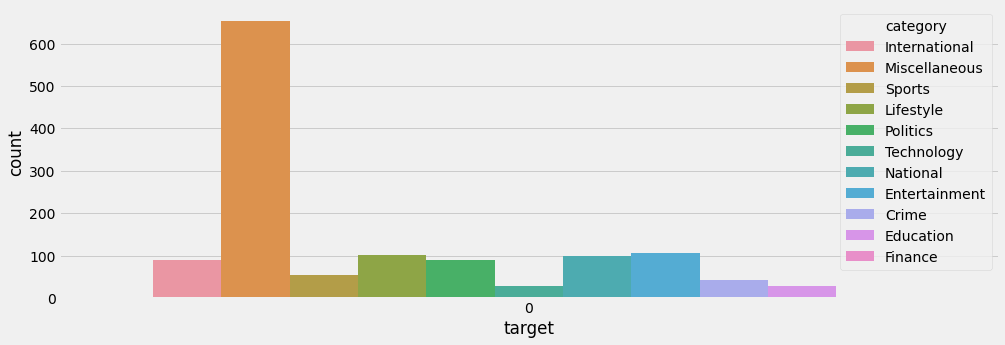

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.countplot(x='target' ,data=fake,hue='category')

In [ ]:
df['text']=df['headline']+" "+df['content']

In [ ]:
df.head(2)

,articleID,domain,date,category,source,relation,headline,content,label,target,F-type,text
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,1,NaN,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,0.0,1,NaN,টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...


In [ ]:
df.drop(['articleID','domain','date','category', 'source' , 'relation' , 'headline', 'content', 'F-type', 'label'],axis=1,inplace=True)
df.head()

,target,text
0,1,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1,1,টস হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যা...
2,1,রাজধানীতে বিশেষ অভিযানে আটক ৪৩ রাজধানীতে মাদক ...
3,1,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...
4,1,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'..."


#Number of worlds in real and fake news

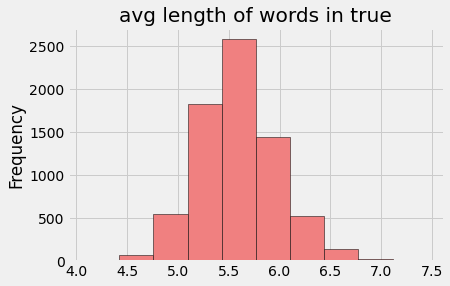

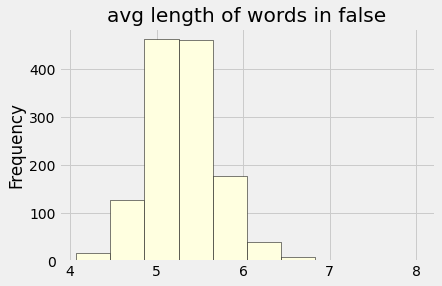

In [ ]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightyellow',title='avg length of words in false')
plt.show()

#Average Length in real and Fake News

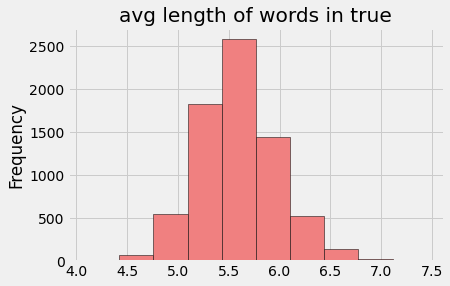

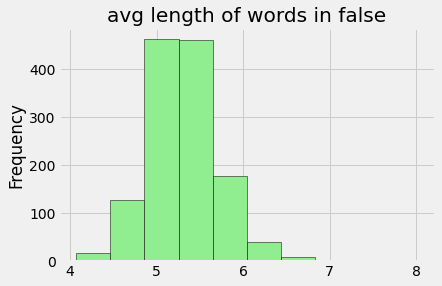

In [ ]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',edgecolor='black',color='lightgreen',title='avg length of words in false')
plt.show()

#Analyzing the stopwords in real and fake news

##First Way

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# creating sample words
def create_words(target):
    words = []
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            words.append(i)
    return words

In [ ]:
from matplotlib import font_manager
import matplotlib

font_dirs = ['content/drive/MyDrive/research/kalpurush.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [ ]:
from collections import defaultdict
def analyze_stopwords(data,fun,target):
    values_list=[]
    dic=defaultdict(int)
    for i in range(0,len(target)):
        corpus=fun(target[i])
        for word in corpus:
            dic[word]+=1
        top=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:10]
        x_items,y_items=zip(*top)
        values_list.append(x_items)
        values_list.append(y_items)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Real")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Fake")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2447 missing from current font.
  font.set_text(s

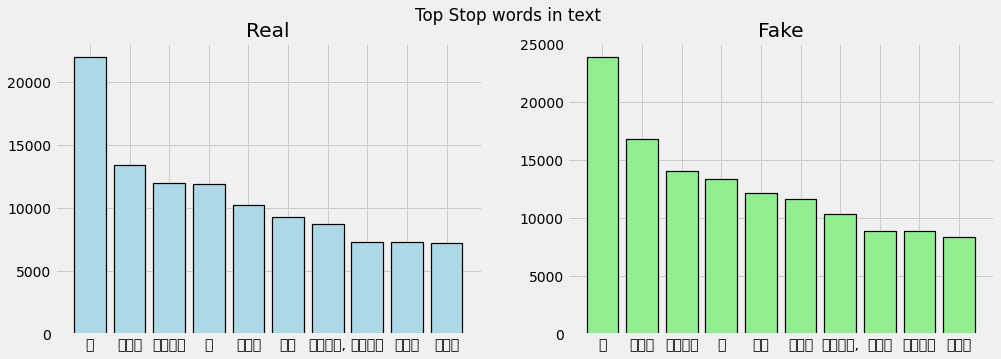

In [ ]:
analyze_stopwords(df,create_words,[1,0])

##Second Way frequent word count

In [ ]:
from collections import Counter
df['temp_list']=df['text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['temp_list'] for word in li])
temp_1=pd.DataFrame(top.most_common(25))
temp_1.columns=["most_common_words","frequency"]
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,ও,23902
1,করে,16837
2,থেকে,14041
3,এ,13357
4,এই,12172
5,করা,11642
6,"বলেন,",10367
7,তার,8929
8,তিনি,8907
9,এবং,8375


In [ ]:
import plotly.express as pe
import plotly.figure_factory as ff
fig = pe.bar(temp_1, x="frequency", y="most_common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='most_common_words')
fig.show()

#Analyzing the punction mark in Real and Fake News

In [ ]:
import string
punctuation_list=list(string.punctuation)
value_list=[]
def most_occuring(dataset,fun,target):
    d=defaultdict(int)
    for j in range(0,len(target)):
        words=fun(target[j])
        for i in words:
            if i in punctuation_list:
                d[i]+=1
        top=sorted(d.items(),key=lambda x: x[1],reverse=True)[:10]
        x_items,y_counts=zip(*top)
        value_list.append(x_items)
        value_list.append(y_counts)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(value_list[0],value_list[1],color="lightcoral",edgecolor='black', linewidth=1.2)
    ax1.set_title("Real")
    
    ax2.bar(value_list[2],value_list[3],color="purple",edgecolor='black', linewidth=1.2)
    ax2.set_title("Fake")
            
    plt.suptitle("Punctuations in text")
    plt.show()

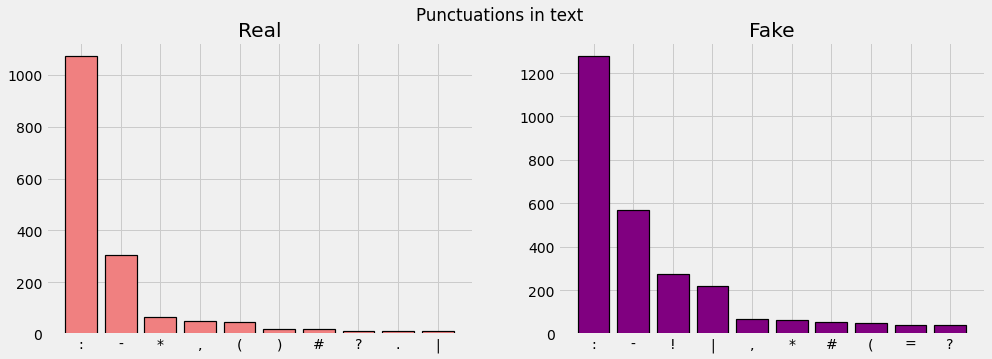

In [ ]:
most_occuring(df,create_words,[1,0])

#Text prepossing

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
import nltk
nltk.download('punkt')

In [ ]:
nltk.download('wordnet')

In [ ]:
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

In [ ]:
#striping punctuations
puncList = ["।", "”", "“", "’"]
for p in string.punctuation.lstrip():
    puncList.append(p)

In [ ]:

#word tokenizer
def word_tokenize(doc):
    # remove punctuation
    tokens = []
    def cleanword(word):
        for p in puncList:
            word = word.replace(p, "")
        word = re.sub(r'[\u09E6-\u09EF]', "", word, re.DEBUG)  # replace digits

        return word

    for word in doc.split(" "):
        word = cleanword(word)
        if word != "":
            tokens.append(word)

    return tokens

In [ ]:
import re
import string

# from nltk.corpus import stopwords

def clean_text(text):
    """Process text function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    lemmatizer = BengaliLemmatizer()
    # stopwords_english = stopwords.words('english')

    stopWords_Bangla= stopWords


    #text= re.sub('\[[^]]*\]', '', text)
    # remove stock market tickers like $GE
    #text = re.sub(r'\$\w*', '', text)
    #removal of html tags
    #review =re.sub(r'<.*?>',' ',text) 
    # remove old style retweet text "RT"
    #text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    #text = re.sub(r'#', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    text = re.sub('[\u09E6-\u09EF]',' ',text) 
    # text = text.lower()
    text_tokens =word_tokenize(text)

    text_clean = []
    for word in  text_tokens:
        if (word not in stopWords_Bangla and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            lem_word =lemmatizer.lemmatize(word)  # lemmitiging word
            text_clean.append(lem_word)
    text_mod=[i for i in text_clean if len(i)>2]
    text_clean=' '.join(text_mod)
    return  text_clean

In [ ]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [ ]:
df['clean_text'][:5]

0    হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ ক্রি...
1    হেরে বোলিংয়ে বাংলাদেশ এশিয়া কাপের ষষ্ঠ ম্যাচে ...
2    রাজধানীতে অভিযানে আটক রাজধানীতে মাদক বিরোধী অভ...
3    উস্কানি রোধে নজরদারি সামাজিক যোগাযোগ সনাতন ধর্...
4    তেল আসত দিনে আসবে অতি দ্রুত ভারত পাইপ লাইনের স...
Name: clean_text, dtype: object

#Look at the top worlds in the dataset

In [ ]:
df['clean_temp']=df['clean_text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['clean_temp'] for word in li])
temp_2=pd.DataFrame(top.most_common(20))
temp_2.columns=["common_words",'frequency']
temp_2.style.background_gradient(cmap='Blues')

,common_words,frequency
0,হয়েছে,9817
1,যাওয়া,7078
2,হয়ে,5791
3,কথা,5213
4,সময়,4994
5,দিয়ে,4849
6,বাংলাদেশ,4739
7,জানান,4478
8,সেপ্টেম্বর,3916
9,পুলিশ,3763


In [ ]:
!pip install arabic-reshaper

In [ ]:
!pip install python-bidi

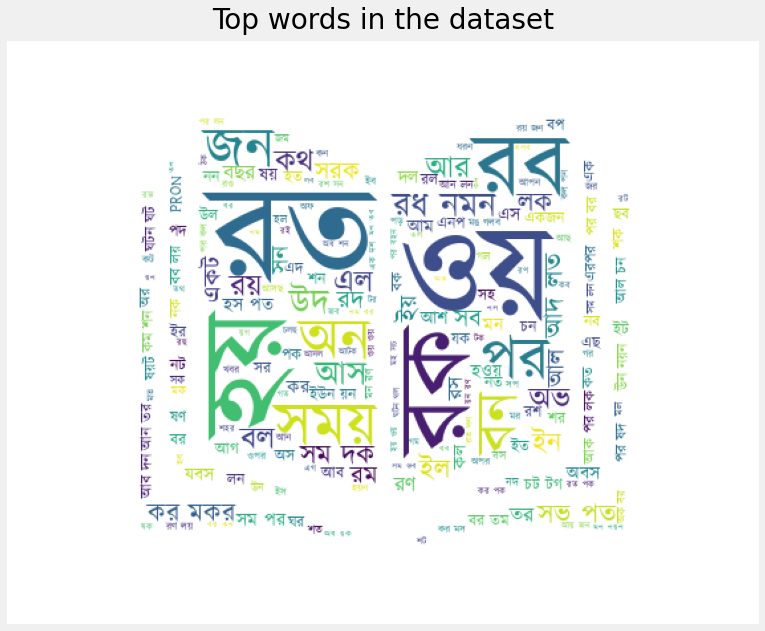

In [ ]:
# wordcloud
from PIL import Image
book_mask = np.array(Image.open('/content/drive/MyDrive/research/book.jpg'))
#text1 = get_display(arabic_reshaper.reshape(common_words).all())
wc = WordCloud(
    font_path='/content/drive/MyDrive/research/kalpurush.ttf',
    background_color='white', 
    max_words=200, 
    mask=book_mask,
)
wc.generate(' '.join(text for text in df.loc[:, 'clean_text']))
plt.figure(figsize=(18,10))
plt.title('Top words in the dataset', 
          fontdict={'size': 28,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()